____
### Basic Thomas-Fermi Mean-Ionization-State Code (Python)
#### Michael S. Murillo
29 June 2016; 28 April 2017
____


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

___
This is the $\langle Z \rangle$ function, which is just a straight coding of the More model.
___

In [4]:
def zbar(Z, AM, rho, T):
    """
    Finite Temperature Thomas Fermi Charge State using 
    R.M. More, "Pressure Ionization, Resonances, and the
    Continuity of Bound and Free States", Adv. in Atomic 
    Mol. Phys., Vol. 21, p. 332 (Table IV).
    
    Z = atomic number
    AM = atomic mass
    rho = density (g/cc)
    T = temperature (eV)
    """

    alpha = 14.3139
    beta = 0.6624
    a1 = 0.003323
    a2 = 0.9718
    a3 = 9.26148e-5
    a4 = 3.10165
    b0 = -1.7630
    b1 = 1.43175
    b2 = 0.31546
    c1 = -0.366667
    c2 = 0.983333
    
    R = rho/(Z*AM)
    T0 = T/Z**(4./3.)
    Tf = T0/(1+T0)
    A = a1*T0**a2+a3*T0**a4
    B = -np.exp(b0+b1*Tf+b2*Tf**7)
    C = c1*Tf+c2
    Q1 = A*R**B
    Q = (R**C+Q1**C)**(1/C)
    x = alpha*Q**beta

    return Z*x/(1 + x + np.sqrt(1 + 2.*x))

___
This is a driver code that loops over things and makes some plots. In particular it currently:
* sums over several densities, assumed to be in g/cc,
* plots $\langle Z\rangle$ versus temperature on a linear-log scale.

Customize it!
___

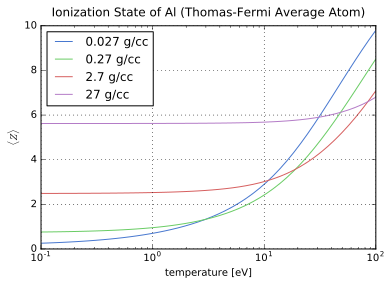

In [6]:
T_min = -1 # log scale
T_max = 2
Z_nuclear = 13
atomic_mass = 26
densities = [0.027, 0.27, 2.7, 27]

for rho in densities:
    temps = []
    zbars = []
    for temp in np.linspace(T_min,T_max):
        actual_temp = 10**temp
        temps.append(actual_temp)
        zbars.append(zbar(Z_nuclear, atomic_mass, rho, actual_temp))
    plt.plot(temps,zbars,label=str(rho)+' g/cc')

plt.title('Ionization State of Al (Thomas-Fermi Average Atom)',y=1.02)
plt.ylabel('$\\langle Z\\rangle$')
plt.xlabel('temperature [eV]')
plt.xscale("log") 
plt.legend(loc='best')
plt.grid()
# plt.savefig('my_zbar_plot.pdf')